(-0.5, 639.5, 575.5, -0.5)

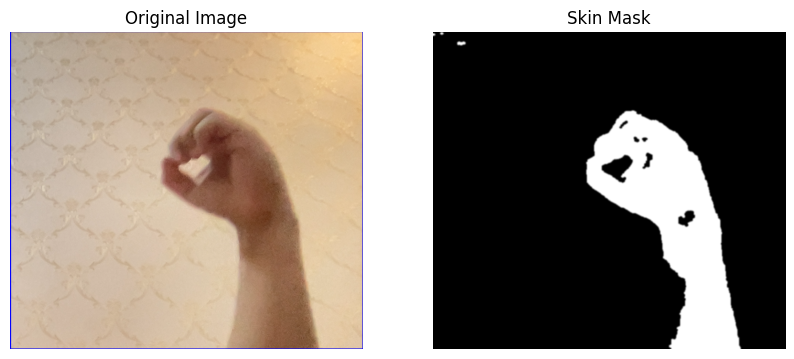

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh gốc
image_path = "data/O/image_100.png"
image = cv2.imread(image_path)

# Chuyển ảnh sang không gian màu HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Ngưỡng màu da để tạo mask (có thể điều chỉnh nếu cần)
lower_skin = np.array([0, 20, 20], dtype=np.uint8)  # Giá trị HSV thấp
upper_skin = np.array([170, 170, 170], dtype=np.uint8)  # Giá trị HSV cao

# Tạo mask bằng cách lọc màu da
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# Làm sạch mask bằng các phép toán hình học (dilate và erode)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Đóng lỗ
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Loại bỏ nhiễu nhỏ

# Tùy chọn: Làm mịn cạnh bằng GaussianBlur
mask = cv2.GaussianBlur(mask, (5, 5), 0)

# Hiển thị và lưu kết quả

# Hiển thị ảnh gốc và mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Skin Mask")
plt.axis("off")
